<h1>Mixture of Gaussian and Gaussian measurement error model</h1>
<h2> Description of data</h2>
<p>
    The package requires users to fit a three-column data file into the models. The first column should be the time of each observation in ascending order, the second column is the magnitude of brightness, and the third column is the error for each observation. If your datafile contains additional columns, be sure to filter out these three columns before bringing them into the program. In most cases, each column of data will have a header, so skip those header rows to avoid errors when loading your data. Detailed instructions for loading text files can be found <a href="https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html">here </a>. Below is an example of the datafile.

</p>
<table>
  <tr>
    <td>383.59</td>
    <td>17.993</td>
    <td>0.063</td>
  </tr>
  <tr>
    <td>398.76</td>
    <td>18.010</td>
    <td>0.083</td>
  </tr>
  <tr>
    <td>419.70</td>
    <td>18.066</td>
    <td>0.069</td>
  <tr>
    <td>436.62</td>
    <td>18.049</td>
    <td>0.074</td>
  <tr>
    <td>471.60</td>
    <td>18.098</td>
    <td>0.064</td>
  <tr>
    <td>494.53</td>
    <td>18.029</td>
    <td>0.101</td>
  <tr>
    <td>501.49</td>
    <td>18.047</td>
    <td>0.078</td>
  <tr>
    <td>563.83</td>
    <td>18.090</td>
    <td>0.081</td>
  </tr>
  <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>
<p>
  These three columns were extracted from macho.dat. The macho.dat is the brightness time series data of MACHO source 70.11469.82, and are irregularly observed via an R-band optical filter on 242 nights for 7.5 years since 1992. The graph below shows all 242 observations in macho.dat. The x-axis is the time for each observation, and the y-axis represents the magnitude of the brightness.
</p>

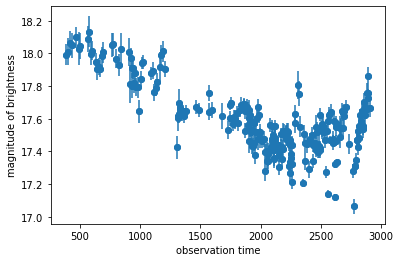

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("D:/project/datafile.txt")
x, y = data[:,0], data[:,1]
plt.scatter(x,y)

error = data[:,2]
plt.errorbar(x, y, yerr=error, fmt="o")
plt.xlabel("observation time")
plt.ylabel("magnitude of brightness")
plt.show()

<h2>Description of the function</h2>
<p>
    Mixture of Gaussian and Gaussian measurement error (GG) is a mixture of two Gaussian errors that share the same mean and different variance,so that each one can have larger variances for outlying observations.
</p>
<p>
    There are 20 parameters involved in the calculation of GG model. The following table shows the value and detailed descriptions for each parameter.
</p>
<table>
  <tr>
    <td>data:</td>
    <td style='text-align: left'><strong>data</strong>. It defines the data that the user wants to fit for this model.</td>
  </tr>
  <tr>
    <td>z_ini:</td>
    <td style='text-align: left'><strong>np.repeat(0, len(time))</strong>. A list contains initial values of z<sub>i</sub>. z<sub>i</sub> is a latent outlier indicator that is 1 if datum i is an outlying observation and 0 otherwise. In this package, the initial value for each z is zero. So it is a list of zero, with length of number of observations.</td>
  </tr>
  <tr>
    <td>theta_ini:</td>
    <td style='text-align: left'><strong>0.01</strong>. An initial value of θ , which is the probability of being an outlier.</td>
  </tr>
  <tr>
    <td>alpha_ini:</td>
    <td style='text-align: left'><strong>np.repeat(1, len(time))</strong>. A list contains initial values of α<sub>i</sub>. Errors in two models with the same mean and different variances if α<sub>i</sub> is fixed at a constant or at its MLE. In this package, the initial value for each α is one. So it is a list of one, with length of number of observations.</td>
  </tr>
  <tr>
    <td>OU_ini:</td>
    <td style='text-align: left'><strong>list((18.2, 0.01, 200))</strong>. A list contains initial values for mu, sigma and tau respectively.</td>
  </tr>
  <tr>
    <td>tau_prior_shape:</td>
    <td style='text-align: left'><strong>1</strong>. The shape of the prior distribution for τ.</td>
  </tr>
  <tr>
    <td>tau_prior_scale:</td>
    <td style='text-align: left'><strong>1</strong>. The scale of the prior distribution for τ.</td>
  </tr>
  <tr>
    <td>sigma_prior_shape:</td>
    <td style='text-align: left'><strong>1</strong>. The shape of the prior distribution for σ.</td>
  </tr>
  <tr>
    <td>sigma_prior_scale:</td>
    <td style='text-align: left'><strong>10**(-7)</strong>. The scale of the prior distribution for σ.</td>
  </tr>
  <tr>
    <td>tau_log_jump_scale:</td>
    <td style='text-align: left'><strong>1.5</strong>. Don’t know.</td>
  </tr>
  <tr>
    <td>a_beta:</td>
    <td style='text-align: left'><strong>2.42</strong>. It is the product of the number of pseudo observations that affects the precision of the Beta prior distribution (k) and the proportion of outlying observations (m). It is involved in the calculation of Beta distribution of θ.</td>
  </tr>
  <tr>
    <td>b_beta:</td>
    <td style='text-align: left'><strong>239.58</strong>. It is the product of k and (1-m). It is involved in the calculation of Beta distribution of θ.</td>
  </tr>
  <tr>
    <td>df_scale:</td>
    <td style='text-align: left'><strong>0.23</strong>. The scale of a normal distribution, and the new degrees of freedom can be calculated by randomly picking a number from the normal distribution.</td>
  </tr>
  <tr>
    <td>t_df:</td>
    <td style='text-align: left'><strong>4</strong>. The initial value of degrees of freedom.</td>
  </tr>
  <tr>
    <td>alpha_update:</td>
    <td style='text-align: left'><strong>False</strong>. A boolean value used to determine whether to keep updating the value of α or not.</td>
  </tr>
  <tr>
    <td>z_update:</td>
    <td style='text-align: left'><strong>True</strong>. A boolean value used to determine whether to keep updating the value of z or not.</td>
  </tr>
  <tr>
    <td>theta_update:</td>
    <td style='text-align: left'><strong>True</strong>. A boolean value used to determine whether to keep updating the value of θ or not.</td>
  </tr>
  <tr>
    <td>df_random:</td>
    <td style='text-align: left'><strong>False</strong>. A boolean value used to determine whether to keep updating the value of degrees of freedom or not.</td>
  </tr>
  <tr>
    <td>sample_size:</td>
    <td style='text-align: left'><strong>nsample</strong>. Number of MCMC samples the user wants to fit for the model.</td>
  </tr>
  <tr>
    <td>warmingup_size:</td>
    <td style='text-align: left'><strong>nwarm</strong>. Number of MCMC samples the user wants to use for warming up.</td>
  </tr>
</table>
<p>
    Given these parameters, the function implements MCMC method on the model, and returns the outputs for users’ demands.  
</p>

<h2>How to use the package and the outputs</h2>
<p>
  GG measurement error model calculates eight parameters, mu (μ), log 10 of sigma (σ), log 10 of tau (τ), accept rate for tau, degree of freedom, accept rate for degree of freedom, theta (θ) and rate for Z. Since the package returns a list includes all the parameters, if the users want to retrieve any of the parameters, they simply specify the index of it in the list. Here is the index for each parameter.
  </p>

<table>
  <tr>
    <td>mu</td>
    <td>0</td>
  </tr>
  <tr>
    <td>sigma</td>
    <td>1</td>
  </tr>
  <tr>
    <td>tau</td>
    <td>2</td>
  <tr>
    <td>accept rate for tau</td>
    <td>3</td>
  <tr>
    <td>degree of freedom</td>
    <td>4</td>
  <tr>
    <td>accept rate for degree of freedom</td>
    <td>5</td>
  <tr>
    <td>theta</td>
    <td>6</td>
  <tr>
    <td>rate for z</td>
    <td>7</td>
  </tr>
</table>

<p>
  For example, if you want the 100 samples values of mu with GG model, you can type the code below.
</p>

In [2]:
import drw4e as drw
dat_temp = np.loadtxt("D:/project/macho.dat", skiprows=2)

# removing the data with negative measurement errors

data = dat_temp[:, [0, 3, 4]]
data = data[data[:,2]>0, :]

gg = drw.GG(data=data, nsample=100, nwarm=100)
mu = gg[0]
print (mu)

[17.73465002 17.79614151 17.45480048 18.1082349  17.97179371 17.61385033
 17.53162858 17.66309374 17.73508479 17.76451611 17.79985112 17.83203642
 17.79298026 17.54945981 17.90650809 17.82259157 17.61769864 17.6531982
 17.69260758 17.73019466 17.72916054 17.75001737 17.66401384 17.72888319
 17.87400995 17.54601583 18.21113838 17.55461852 18.15051355 17.47818918
 17.70074395 17.70787863 17.80904169 17.52919251 17.67979529 17.38970916
 17.44937242 18.05498625 17.72847096 17.73896169 17.78236589 17.6418595
 17.76795056 17.73468201 17.46255849 18.17722551 17.92867695 17.95249117
 17.60520766 17.79976812 17.77558729 17.91509521 17.82832886 17.47282567
 17.57754845 17.64528603 17.77443923 17.70236554 17.80920505 17.78499835
 17.63696075 17.92479018 17.60012726 17.80795794 17.75675835 17.81744902
 17.68936041 17.72543702 17.88107105 17.87254435 17.27962283 17.71322947
 17.31283111 17.24798379 19.02563248 18.42400047 18.22382847 17.76316888
 17.81452187 18.03203302 17.63626977 17.73552265 17.5

<p>
  In most cases, 100 sample data is far from enough. In order to be able to see tens of thousands of data clearly, storing the output data in a txt file is necessary. To continue the above example, you can run the following codes:
</p>

In [3]:
import numpy as np
datafile_path = "D:/project/GG_mu_notebook.txt"
np.savetxt(datafile_path , mu)

<p>
 The “datafile_path” in the parenthesis defines where you want to save the txt file on your computer, and “mu” illustrates what you want to save in the txt file. If you want a txt file contains more elements such as, column names and specified format, please visit <a href="https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html">here</a>. for more detailed instructions. 
  
  Given the output MCMC samples, you can draw a pair-wise graph to have a better sense of the distribution. Here is an example of GG model fitted with macho.dat.
</p>

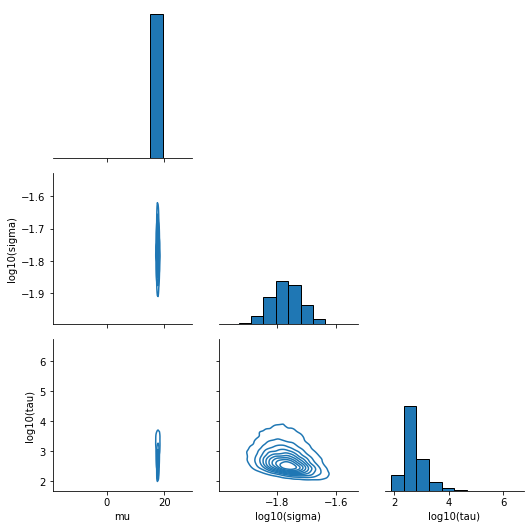

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = np.loadtxt("D:/project/res_GG.txt", skiprows=1)
a = data[:, 0]
b = data[:, 1]
c = data[:, 2]

df = pd.DataFrame(list(zip(a, b, c)), columns=['mu', 'log10(sigma)', 'log10(tau)'])
grid = sns.PairGrid(df, vars=['mu', 'log10(sigma)', 'log10(tau)'], corner=True)
grid = grid.map_diag(plt.hist, bins = 10, edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot)
plt.show()